In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Leitura de Dados

In [9]:
df_atributos = pd.read_json(r'data\\raw\\pokemons_atributos.json')

In [20]:
df_combats = pd.read_json(r'data\\raw\\combats.json')

In [27]:
df_combats_winners = df_combats['winner'].value_counts().reset_index().rename(
columns={'winner': 'id', 'index': 'pokemon_id', 'count':'wins'}
).sort_values(by='wins', ascending=False)

df_combats_winners

,id,wins
0,163,152
1,438,136
2,154,136
3,428,134
4,314,133
...,...,...
778,577,5
779,639,4
780,237,4
781,290,3


In [29]:
df_atributos['types']

0       Grass/Poison
1       Grass/Poison
2       Grass/Poison
3       Grass/Poison
4               Fire
           ...      
794       Rock/Fairy
795       Rock/Fairy
796    Psychic/Ghost
797     Psychic/Dark
798       Fire/Water
Name: types, Length: 799, dtype: object

In [24]:
df_combats_winners = df_combats['winner'].value_counts().reset_index().rename(columns={'index': 'pokemon_id', 'winner': 'id', 'count':'wins'}).sort_values(by='id', ascending=False)
df_combats_winners

,id,wins
297,800,75
209,799,89
405,798,60
45,797,116
554,796,39
...,...,...
451,5,55
329,4,70
211,3,89
512,2,46


In [23]:
df_atributos = pd.read_json(r'data\\raw\\pokemons_atributos.json')

df_combats = pd.read_json(r'data\\raw\\combats.json')

df_combats_winners = df_combats['winner'].value_counts().reset_index().rename(columns={'index': 'pokemon_id', 'winner': 'id', 'count':'wins'}).sort_values(by='id', ascending=False)

df_atributos = pd.merge(
df_atributos,
df_combats_winners,
on='id',  # Coluna com mesmo nome em ambos
how='left'
)

df_atributos.head()

,id,name,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,types,wins
0,1,Bulbasaur,45,49,49,65,65,45,1,false,Grass/Poison,37.0
1,2,Ivysaur,60,62,63,80,80,60,1,false,Grass/Poison,46.0
2,3,Venusaur,80,82,83,100,100,80,1,false,Grass/Poison,89.0
3,4,Mega Venusaur,80,100,123,122,120,80,1,false,Grass/Poison,70.0
4,5,Charmander,39,52,43,60,50,65,1,false,Fire,55.0


# Análise Univariada

In [36]:
df_atributos[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation', 'wins']].describe()

,hp,attack,defense,sp_attack,sp_defense,speed,wins
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,782.000000
mean,69.264080,78.968711,73.859825,72.836045,71.904881,68.244055,63.829923
std,25.550218,32.464637,31.199180,32.739641,27.846265,29.063266,32.938315
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000
25%,50.000000,55.000000,50.000000,49.500000,50.000000,45.000000,36.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,61.500000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,91.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,152.000000


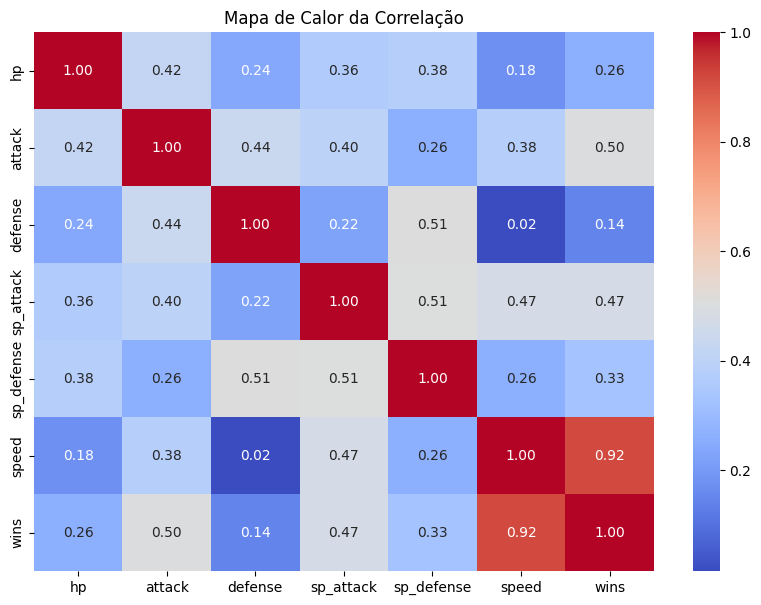

In [38]:
# Lista de colunas *apenas* numéricas
colunas_numericas = [
    'hp', 
    'attack', 
    'defense', 
    'sp_attack', 
    'sp_defense', 
    'speed', 
    'wins'
]

# Calcule a correlação apenas com elas
corr_matrix = df_atributos[colunas_numericas].corr()

# Agora você pode plotar o heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor da Correlação")
plt.show()